In [5]:
# here are the modules which we will need throughout 
import pandas as pd 
import numpy as np 
import plotly 
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.figure_factory as ff 
import numpy as np
import datetime

In [7]:
# Importing the csv file of tweet data and print the information of the data 
'''Here I am working only on 1000 enteries of data, this is a small subset of the data, so that calculations can be 
performed faster on computer, but I am also providing  the full data file, named alltweet.csv in the directory, if 
you have enough computing power you can work on the full data. All the code will be same you just need to replace the 
data at the importing'''
tweet = pd.read_csv("test.csv")
print(tweet.head())

   id                                   user_description     user_location  \
0   1                                                NaN    Haryana, India   
1   2                    @insafiansPowerin۔۔۔Teammarkhor  Lahore, Pakistan   
2   3  Young professionals inspired with what BJP sta...             Delhi   
3   4  துகிலி. சோழதேச வடமன். ஶ்மார்த்தன். கட்டற்ற மென...            சென்னை   
4   5                                                NaN               NaN   

   coordinates                                               text  geo  \
0          NaN  RT @KavitaKaushik_: कांग्रेस के मेनिफेस्टो देख...  NaN   
1          NaN  RT @VORdotcom: Every time I am stuck in traffi...  NaN   
2          NaN  RT @BJPSanjayJoshi: प्रकृति हमारी सभी जरूरतों ...  NaN   
3          NaN  BJP's duty is to device ways so that Hindu's e...  NaN   
4          NaN  RT @PriyaDutt_INC: Together, for a better futu...  NaN   

       user_name                user_created  user_followers  \
0   SatpalPunia5  2018

In [292]:
'''Now as you can see in the dataframe information, we have a coulmn "user_created"which shows the time and date of 
user sign up twitter. I will extract the year of the sign up from all the enteries and make a new column named
"User_created_year" and will merge this column in tweet data frame, so that we can futher make observations out of it '''

result_array = np.array([])
for i in tweet["user_created"]:
    result = i[:4]
    result_array = np.append(result_array, result)
tweet['User_created_year'] = result_array
print(tweet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 17 columns):
id                   1001 non-null int64
user_description     723 non-null object
user_location        647 non-null object
coordinates          0 non-null float64
text                 1001 non-null object
geo                  0 non-null float64
user_name            1001 non-null object
user_created         1001 non-null object
user_followers       1001 non-null int64
id_str               1001 non-null int64
created              1001 non-null object
retweet_count        1001 non-null int64
tweeting_device      1001 non-null object
user_bg_color        1001 non-null object
polarity             1001 non-null float64
subjectivity         1001 non-null float64
User_created_year    1001 non-null object
dtypes: float64(4), int64(4), object(9)
memory usage: 133.0+ KB
None


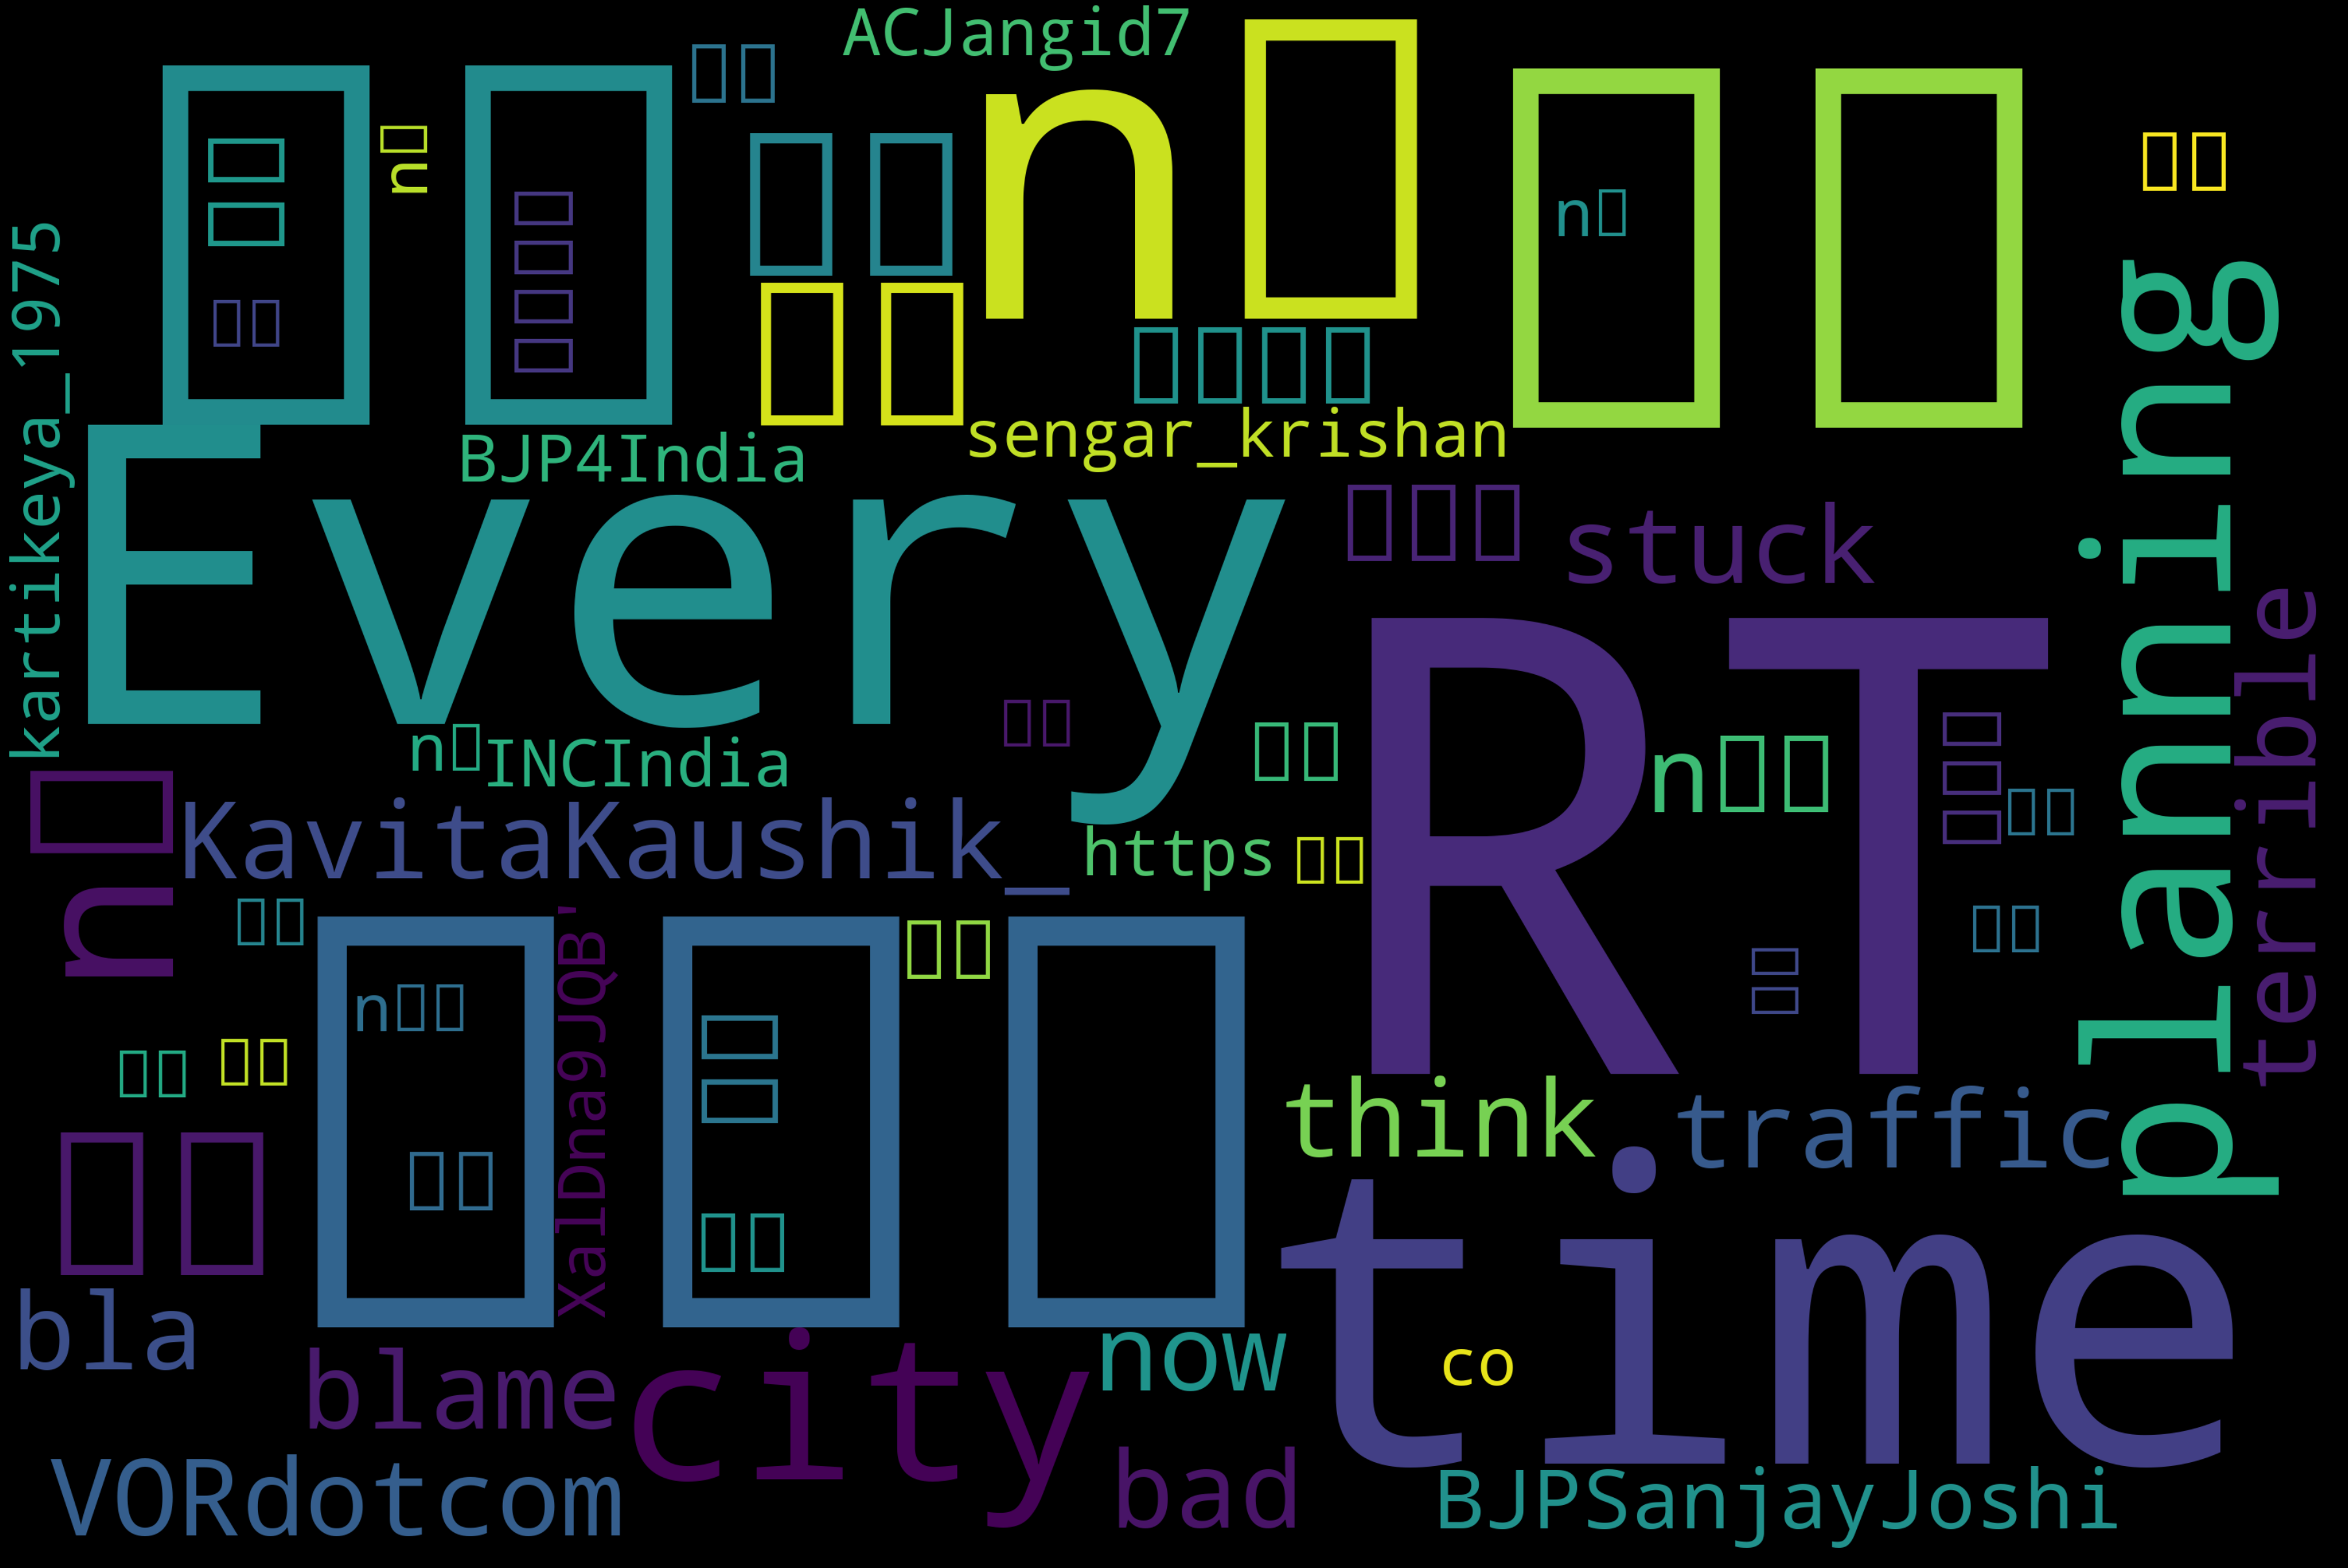

In [293]:
'''Now it is the time of genearitng some observations, first of all we will deal with text fields. we mainly have 3 text 
  fields in our data frame which are important to assess. we have  "user_location", "user_description" and "text" and we are 
  going to make word cloud of all these three fields so that we can can see what is most common in each'''
# word cloud of text field.
text = tweet.text.values
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (50, 40),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
                                                                                                                                                                                                                                                                                                        

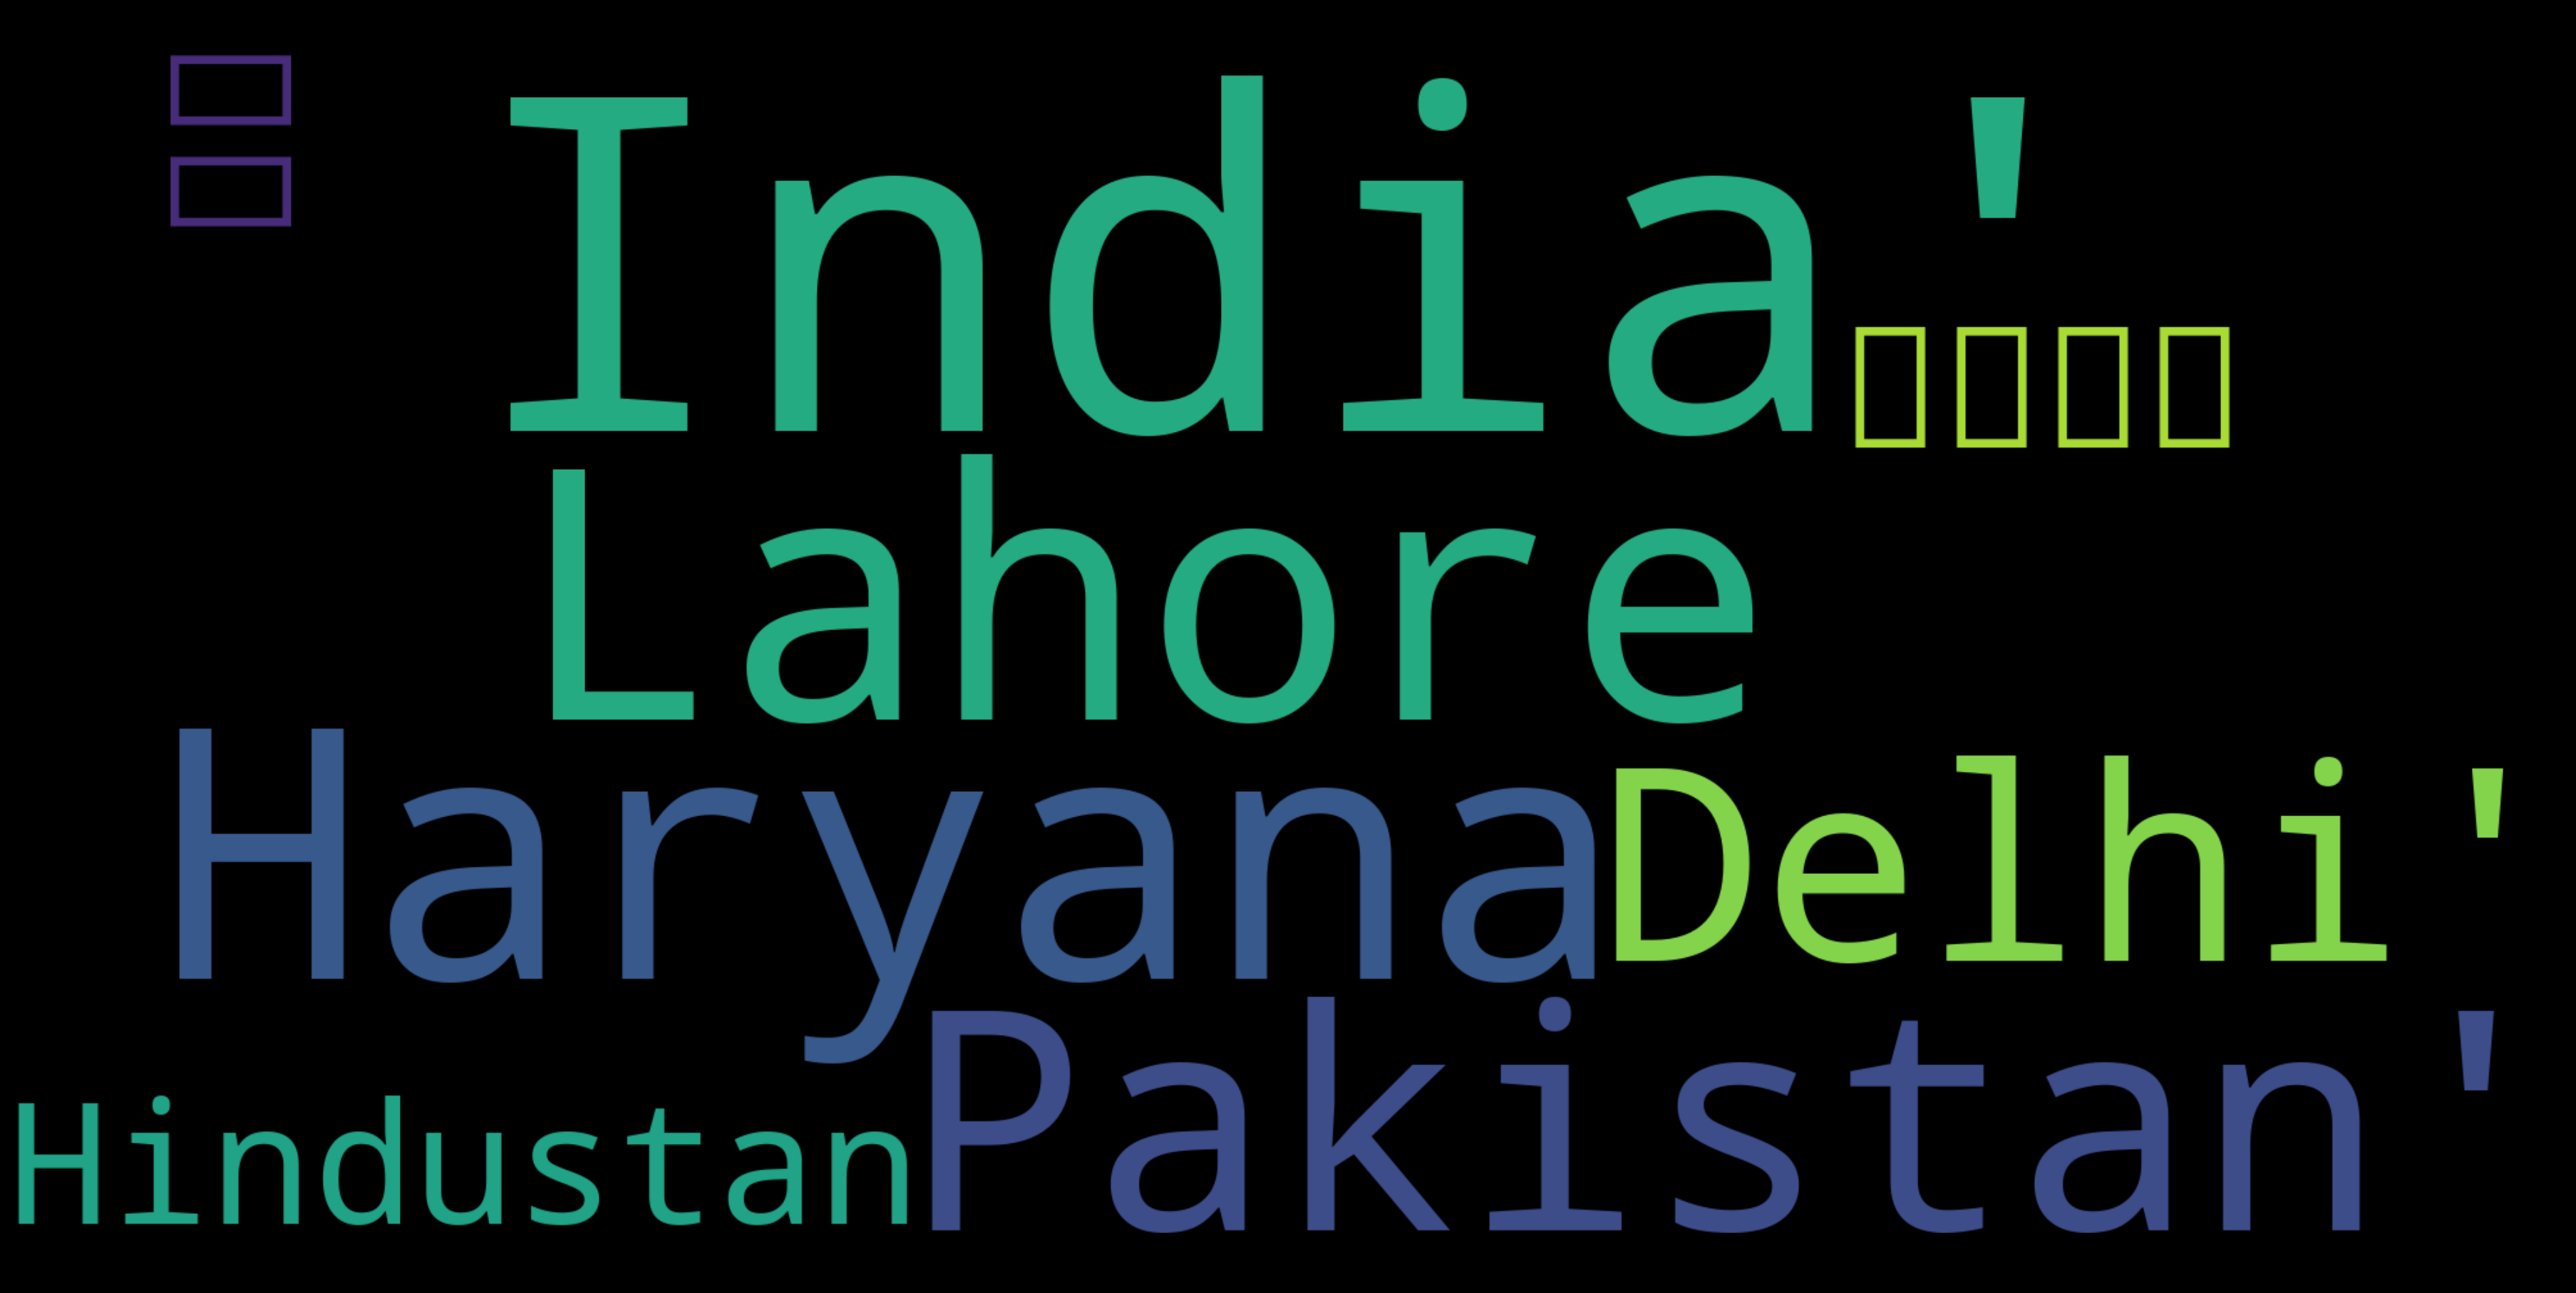

In [294]:
# word cloud of user_location
text = tweet.user_location.values
wordcloud = WordCloud(
    width = 2000,
    height = 1000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (50, 40),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
fig.savefig('plot.png')

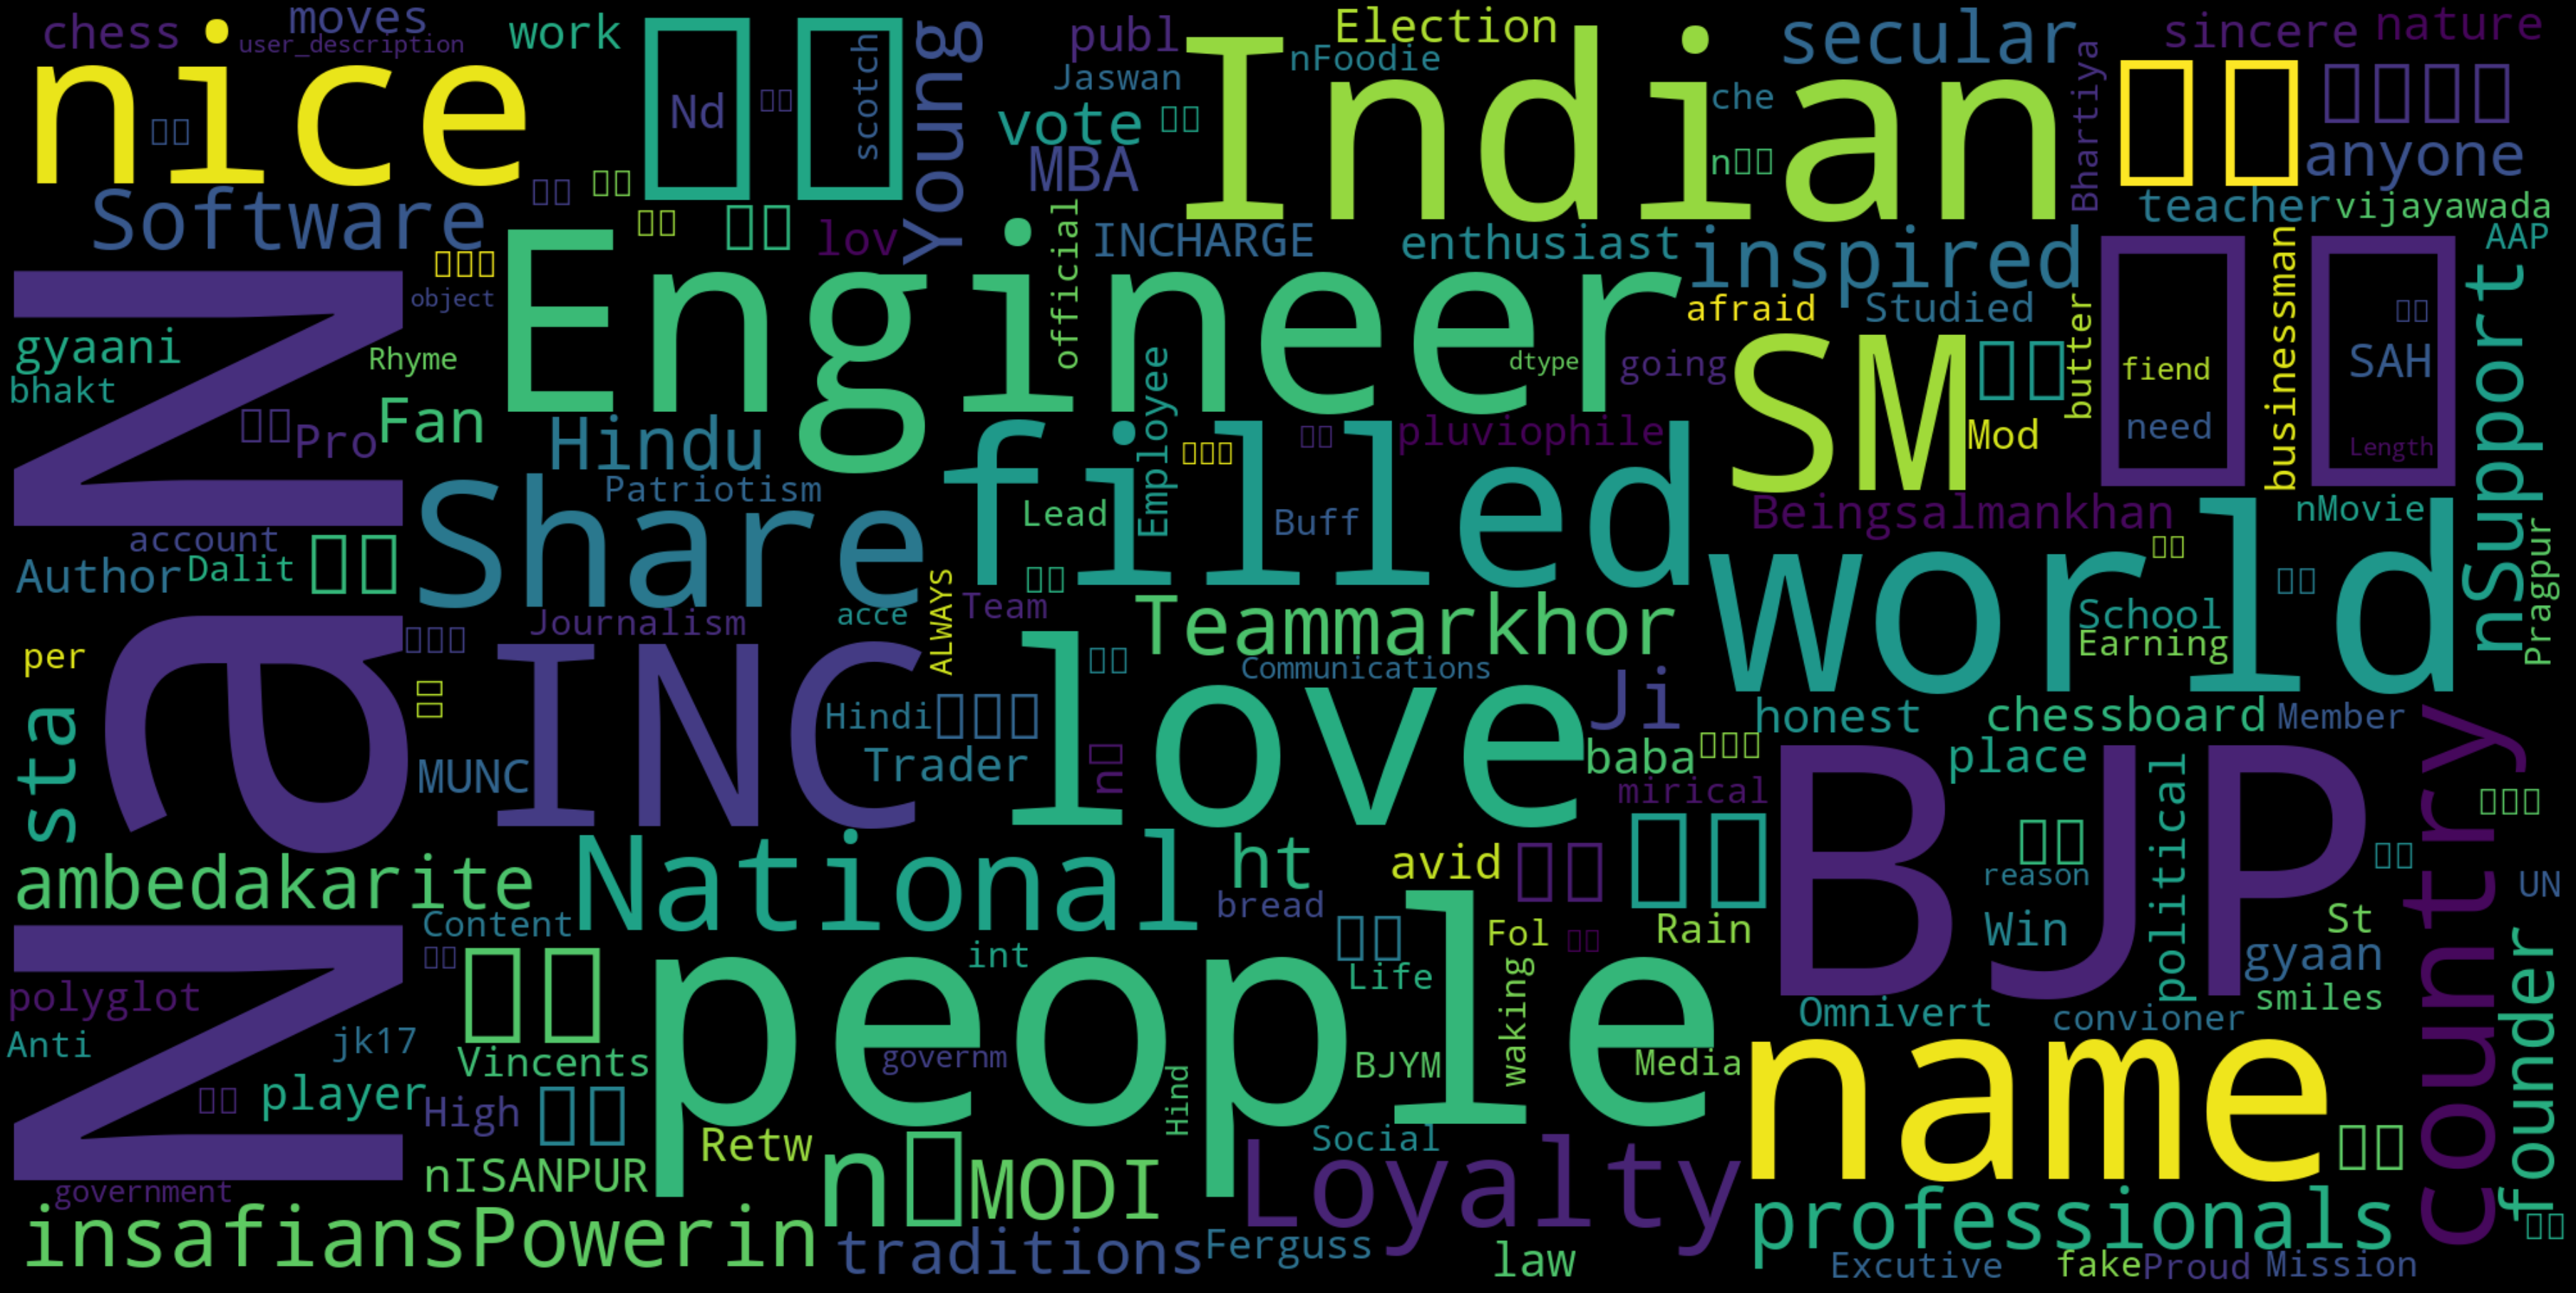

In [295]:
#word cloud of user_description
text = tweet.user_description 
wordcloud = WordCloud(
    width = 2000,
    height = 1000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (50, 40),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [297]:
'''Now we are going to use histogram to understand the frequency of users sign up years, results shows us the linear
 growth in new users sign up in this specfic data set'''
data=[go.Histogram(
    x = tweet.User_created_year,
    name = 'Histogram of users sign up year'    
 )]
layout = go.Layout(title='frequency of user sign up year', 
                   xaxis = dict(title = "Sign up year"),
                   yaxis = dict(title = "Count"),
                   bargap = 0.2)
figure = go.Figure(data= data, layout= layout)
pyo.plot(figure)

'temp-plot.html'

In [298]:
'''Twitter provides us the information about the device which user used to tweet, thus we are going to make  histogram 
 to understand which devices are more used, results shows that Andriod devices has big lead'''
data=[go.Histogram(
    x = tweet.tweeting_device,
    name = 'Histogram of devices used by users to tweet'    
 )]
layout = go.Layout(title='frequency of tweeting devices in the data', 
                   xaxis = dict(title = "Tweeting devices"),
                   yaxis = dict(title = "Count"),
                   bargap = 0.2)
figure = go.Figure(data= data, layout= layout)
pyo.plot(figure)

'temp-plot.html'

In [299]:
'''Now we are going to plot the distribution of subjectivity and polarity of tweets, which we extracted while streaming, 
 to understand the nature of tweets in terms of sentiments in graphical manner'''
trace0 = go.Scatter(
x = tweet.id, 
y = tweet.subjectivity,
mode= 'lines',
name = 'subjectivity variation'
)
trace1 = go.Scatter(
x = tweet.id, 
y = tweet.polarity,
mode= 'lines',
name = 'polarity variation'
)

data = [trace0, trace1]
layout =go.Layout(title='polarity and subjectivity distribution with respect to each tweet',
                  hovermode = 'closest',
                  xaxis = dict(title = "Index"),
                  yaxis = dict(title = "Values")
                 )
figure = go.Figure(data= data, layout = layout)
pyo.plot(figure)

'temp-plot.html'

In [300]:
''' Now we are going to plot the scatter plot between Number of followers of the twitter user and the subjectivity of 
   the tweet posted by that user, this graph provide insights of the tweet's subjectivity of the people who have lot of 
    followers vs people who who less followers'''
data = [go.Scatter(
x = tweet.subjectivity,
y = tweet.user_followers,
mode = "markers"
)]
layout = go.Layout(
title = 'No of followers of twitter user vs Subjectivity of the tweet',
xaxis = dict(title ='Subjectivity'),
yaxis = dict (title= 'No of followers of the user'),
hovermode = 'closest'
) 
figure = go.Figure (data = data, layout = layout)
pyo.plot(figure)

'temp-plot.html'

In [301]:
'''Now we are going to plot the relation ship between user_followers of the twitter user and the polairyt of the tweeted 
 tweet by that user and at the same time we are also showing the subjectivity of that tweet using colormap'''
data = [go.Scatter(
x = tweet.polarity,
y = tweet.user_followers,
text = tweet.user_name, 
mode = "markers",
 marker=dict(
        size= 25*tweet.subjectivity,
        color=tweet.subjectivity, #set color equal to a variable
        colorscale='Viridis', # one of plotly colorscales
        showscale=True 
        ))]
layout = go.Layout(title="Polarity vs user_followers", 
                   hovermode = 'closest',
                   xaxis = dict(title = "Polarity"), 
                   yaxis = dict(title = "User_follower_count")
                  )

fig = go.Figure(data=data, layout=layout)
pyo.plot(fig)

'temp-plot.html'

In [302]:
'''Now are going to plot box plots for user followers distribution for three differnt type of device types, mainly used 
  by the users to tweet. These box plots enable us to understand the distribution of these three device categories in 
  terms of user followers of the users'''
Andriod = tweet.user_followers[tweet.tweeting_device == 'Twitter for Android'] 
Iphone = tweet.user_followers[tweet.tweeting_device == 'Twitter for iPhone']
Web = tweet.user_followers[tweet.tweeting_device == 'Twitter Web App']

trace1 = go.Box(
y = Andriod,
name = 'Andriod'
)
trace2 = go.Box(
y =Iphone,
name = 'Iphone'
)
trace3 = go.Box(
y =Web,
name = 'Web'
)
data = (trace1,trace2, trace3)
layout = go.Layout (title='Box plot distribution of user_followers for various device types', 
                    xaxis = dict(title = "Devices"), 
                    yaxis = dict(title = "User_follower_count")
                   )
figure = go.Figure(data=data, layout=layout)
pyo.plot(figure)

'temp-plot.html'

In [303]:
'''Now are going to plot box plots for polarity distribution of the tweets for three different years of user sign up.
 In other words users, we will compare the sentiment measure, polarity of the tweets of the user who signed up in 
 2017, 2018 and 2019'''
y1 = tweet.polarity[tweet.User_created_year == '2019'] 
y2 = tweet.polarity[tweet.User_created_year == '2018']
y3 = tweet.polarity[tweet.User_created_year == '2017']
trace1 = go.Box(
y = y1,
name = '2019'
)
trace2 = go.Box(
y = y2,
name = '2018'
)
trace3 = go.Box(
y = y3,
name = '2017'
)
data = (trace1,trace2, trace3)
layout = go.Layout (title='Box plot distribution of polarity for various years of user sign up',
                     xaxis = dict(title = "User sign up years"), 
                    yaxis = dict(title = "polarity")
                   )
figure = go.Figure(data=data, layout=layout)
pyo.plot(figure)

'temp-plot.html'

In [304]:
'''Now we are going to make very intersting data visualization called scatterplot matrix where we are able to crate multiple 
   scatter plot in signle plot. Here we are assessing thre main continues variables in our data against each other, which 
   brings us 9 differnt scatter plots in signle graph. We are using User_created_year as factor variable as well. This graph
   shows lot of important insights and relationships of various variables of data'''

test_data = tweet.loc[:, ['polarity', 'subjectivity','user_followers','User_created_year']]
figure = ff.create_scatterplotmatrix(test_data,diag='box', index='User_created_year', colormap_type = 'cat', 
                                     colormap=['#000000', '#744747', '#745547', '#FF0000', '#696969', '#800000', '#FFFF00', '#808080','#A9A9A9', '#8B4513', '#FAFAD2','#00FFFF','#0000FF','#228B22'])
pyo.plot(figure)

'temp-plot.html'

In [305]:
'''So far we have assesed and plotted each continuos and categorical variable availble in data frame, out of which 
we get some insights. But we missed the created date of tweet field named "created", which shows the date and time of
tweet posted.I have streamed all the tweets from April2 2019 to April 30 2109, so it is basiclly one month of data
since, year and month is same so we cant do much with it, but we can extraxt days from this and can find insights about it.
so first of all we will extract dayname in english and add them as a new column named "day_of_week". This categorical data field
 can help us find more insights about data'''
# IMPORTANT "tweet11" is dataframe , which contains all data of orignal data set it is not a subset of data like "tweet" dataframe.

tweet11['created'] = pd.to_datetime(tweet11['created'], errors='coerce')
tweet11['day_of_week'] = tweet11['created'].dt.weekday_name

In [306]:
'''Now we have retreived the days of tweets in the month of stream. Now firstly we are going to plot the frewunecy of these 
days using histogram, which will provide the insights of most busy days in terms of tweeted tweets'''

data=[go.Histogram(
    x = tweet11.day_of_week,
    name = 'Histogram of users sign up year'    
 )]
layout = go.Layout(title='frequency of tweets on different days of week', 
                   xaxis = dict(title = "Days of tweets"),
                   yaxis = dict(title = "Count of tweets"),
                   bargap = 0.2)
figure = go.Figure(data= data, layout= layout)
pyo.plot(figure)

'temp-plot.html'

In [279]:
'''Now at the end we are going to make polarity distribution of tweets for various days of weeks. This graph provide us the
 comparision between '''
Mon = tweet11.polarity[tweet11.day_of_week == 'Monday'] 
Tue = tweet11.polarity[tweet11.day_of_week== 'Tuesday']
Wed = tweet11.polarity[tweet11.day_of_week== 'Wednesday']
Thu = tweet11.polarity[tweet11.day_of_week == 'Thursday']
Fri = tweet11.polarity[tweet11.day_of_week == 'Friday'] 
Sat = tweet11.polarity[tweet11.day_of_week == 'Saturday']
Sun = tweet11.polarity[tweet11.day_of_week == 'Sunday']

trace1 = go.Box(
y = Mon,
name = 'Monday'
)
trace2 = go.Box(
y =Tue,
name = 'Tuesday'
)
trace3 = go.Box(
y =Wed,
name = 'Wednesday'
)
trace4 = go.Box(
y = Thu,
name = 'Thursady'
)
trace5 = go.Box(
y = Fri,
name = 'Friday'
)
trace6 = go.Box(
y =Sat,
name = 'Saturday'
)
trace7 = go.Box(
y =Sun,
name = 'Sunday'
)
data = (trace1,trace2, trace3,trace4,trace5,trace6,trace7)
layout = go.Layout (title='Box plot distribution of polarity for various days', 
                    xaxis = dict(title = "Days"), 
                    yaxis = dict(title = "polarity")
                   )
figure = go.Figure(data=data, layout=layout)
pyo.plot(figure)

'temp-plot.html'